# 1 Notebook: Test_enet_bce

Generate:
1. Metrics: ROC curves, confusion matrix, `metrics_per_class_{train/val/test}.csv`
2. Sigmoid predictions (hot-encoded) csv's

In [41]:
import argparse
import sys
experiment_name = 'dataset2_enet_model_bce'
im_size = 300
batch_size = 64
data_path = "/home/sebastian/codes/SensoryCity_working/0_classifier/Split"
file_name = 'test'
resume = f'./{experiment_name}/model_weights.pth'

In [42]:
import torch
import os
import argparse
import sys
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np
import time
from tqdm import tqdm
from net.metrics import *
from net.models import *

In [43]:
args = argparse.Namespace()

def get_args_parser():
    parser = argparse.ArgumentParser(description="Train and test a model with folder-based data structure.")
    parser.add_argument('--experiment_name', type=str, default=experiment_name)
    parser.add_argument('--resume', type=str, default=experiment_name)
    parser.add_argument('--im_size', type=tuple, default=im_size)
    parser.add_argument('--batch_size', type=int, default=batch_size)
    parser.add_argument('--data_path', type=str, default=data_path)
    parser.add_argument('--file_name', default=file_name, type=str, help='file_name')
    return parser

def parse_args():
    global args
    parser = get_args_parser()
    if 'ipykernel' in sys.modules:
        args, unknown = parser.parse_known_args(namespace=args)
    else:
        args = parser.parse_args(namespace=args)
    return args

args = parse_args()
print(args)

Namespace(experiment_name='dataset2_enet_model_bce', resume='dataset2_enet_model_bce', im_size=300, batch_size=64, data_path='/home/sebastian/codes/SensoryCity_working/0_classifier/Split', file_name='test')


In [44]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

specific_path = os.path.join(args.data_path, file_name)
no_aug_transform = transforms.Compose([
        transforms.Resize(args.im_size),
        transforms.CenterCrop(args.im_size),
        transforms.ToTensor()
])
specific_dataset = datasets.ImageFolder(root=specific_path, transform=no_aug_transform)
specific_dataloader = DataLoader(specific_dataset, batch_size=args.batch_size, shuffle=False)
num_classes = len(specific_dataset.classes)
class_names = specific_dataset.classes
class_names

['BI', 'GE', 'MH', 'SI', 'TM', 'VM']

In [45]:
model = load_model(resume, num_classes, device)
model

/home/sebastian/codes/VE_working/net/models.py:77: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=device))


CustomEfficientNet(
  (base_model): EfficientNet(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 40, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): SiLU(inplace=True)
      )
      (1): Sequential(
        (0): MBConv(
          (block): Sequential(
            (0): Conv2dNormActivation(
              (0): Conv2d(40, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=40, bias=False)
              (1): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): SiLU(inplace=True)
            )
            (1): SqueezeExcitation(
              (avgpool): AdaptiveAvgPool2d(output_size=1)
              (fc1): Conv2d(40, 10, kernel_size=(1, 1), stride=(1, 1))
              (fc2): Conv2d(10, 40, kernel_size=(1, 1), stride=(1, 1))
              (activation): SiLU(inplace=True)
          

In [46]:
print(args)

Namespace(experiment_name='dataset2_enet_model_bce', resume='dataset2_enet_model_bce', im_size=300, batch_size=64, data_path='/home/sebastian/codes/SensoryCity_working/0_classifier/Split', file_name='test')


In [47]:
class_names

['BI', 'GE', 'MH', 'SI', 'TM', 'VM']

Evaluating over 6 classes: ['BI', 'GE', 'MH', 'SI', 'TM', 'VM']


/home/sebastian/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(


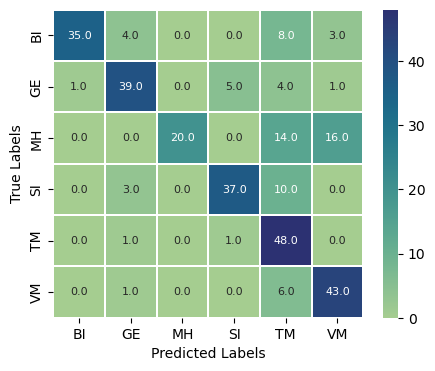

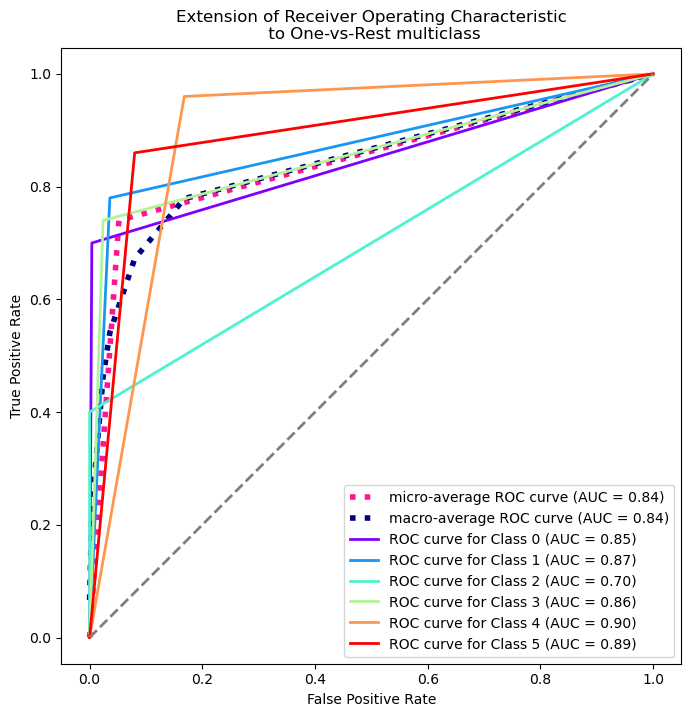

0.21276927143335342
Files stored as in:
(PREDS): ./dataset2_enet_model_bce/test_points_BCE.csv
Metrics on test-images during testing:
  details accuracy precision recall        f1     f0.75 specificity roc_auc
0      BI      0.7  0.972222    0.7  0.813953  0.852827    0.994681   0.848
1      GE     0.78    0.8125   0.78  0.795918  0.800493    0.953125   0.872
2      MH      0.4       1.0    0.4  0.571429  0.649351         1.0     0.7
3      SI     0.74  0.860465   0.74  0.795699   0.81283    0.968586   0.858
4      TM     0.96  0.533333   0.96  0.685714  0.634921    0.805556   0.896
5      VM     0.86   0.68254   0.86  0.761062  0.737311    0.899497    0.89
6  totals     0.74  0.810177   0.74  0.737296  0.747955    0.936908   0.844
Extra Metrics on test-images during testing:
        mcc        f2  balanced_accuracy  kappa  log_loss      loss  \
0  0.701788  0.731459               0.74  0.688  0.750295  0.212769   

   inf. time (s)  
0       0.044644  


In [48]:
metrics_df_test, indv_metrics_df_test  = evaluate_test_bce(specific_dataloader, model, device,class_names, experiment_name, file_name)
print(f"Metrics on test-images during testing:\n{metrics_df_test}")
print(f"Extra Metrics on test-images during testing:\n{indv_metrics_df_test}")

metrics_df_test.to_csv(f'./{experiment_name}/metrics_per_class_{file_name}.csv', index=False)
indv_metrics_df_test.to_csv(f'./{experiment_name}/metrics_indv_extras_{file_name}.csv', index=False)